
# DSC630-T301 Predictive Analytics (2247-1)

Assignment Week 10 Final Project Milestone 5;

Author: Zemelak Goraga;

Date: 8/9/2024

# Step 1: Connecting to a Kaggle API and Pulling the Dataset

In [8]:
# Import required libraries
import subprocess
import os
import zipfile
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Execute the Kaggle API command to download the dataset
command = "kaggle datasets download -d unitednations/global-food-agriculture-statistics"
subprocess.run(command.split())

CompletedProcess(args=['kaggle', 'datasets', 'download', '-d', 'unitednations/global-food-agriculture-statistics'], returncode=0)

In [5]:
# Check if the download was successful
if os.path.exists("global-food-agriculture-statistics.zip"):
    print("Dataset downloaded successfully!")

Dataset downloaded successfully!


In [9]:
# Unzip the downloaded file
with zipfile.ZipFile("global-food-agriculture-statistics.zip", "r") as zip_ref:
    zip_ref.extractall("data")

In [10]:
# Optionally, list the contents of the extracted directory
extracted_files = os.listdir("data")
print("Extracted files:", extracted_files)

Extracted files: ['current_FAO', 'fao_data_crops_data.csv', 'fao_data_fertilizers_data.csv', 'fao_data_forest_data.csv', 'fao_data_land_data.csv', 'fao_data_production_indices_data.csv']


In [ ]:
from zipfile import ZipFile
import pandas as pd

# Download a specific table to work with
# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile("global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')


In [12]:
# Print the first few rows of the dataset
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,866,Cattle,5608,Import Quantity,1961,1961,Head,NaN,M
1,2,Afghanistan,866,Cattle,5608,Import Quantity,1962,1962,Head,NaN,M
2,2,Afghanistan,866,Cattle,5608,Import Quantity,1963,1963,Head,NaN,M
3,2,Afghanistan,866,Cattle,5608,Import Quantity,1964,1964,Head,NaN,M
4,2,Afghanistan,866,Cattle,5608,Import Quantity,1965,1965,Head,NaN,M


In [13]:
# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662958 entries, 0 to 662957
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Area Code     662958 non-null  int64  
 1   Area          662958 non-null  object 
 2   Item Code     662958 non-null  int64  
 3   Item          662958 non-null  object 
 4   Element Code  662958 non-null  int64  
 5   Element       662958 non-null  object 
 6   Year Code     662958 non-null  int64  
 7   Year          662958 non-null  int64  
 8   Unit          662958 non-null  object 
 9   Value         527768 non-null  float64
 10  Flag          459894 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 55.6+ MB


In [14]:
# Filter the dataset where 'Item' (animal_category) = 'Sheep' and 'Element' = 'Export Quantity' or 'Export Value'
sheep_data = df[(df['Item'] == 'Sheep') & (df['Element'].isin(['Export Quantity', 'Export Value']))]

# Display the first few rows of the Sheep_data
sheep_data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
3074,3,Albania,976,Sheep,5908,Export Quantity,1961,1961,Head,0.0,NaN
3075,3,Albania,976,Sheep,5908,Export Quantity,1962,1962,Head,0.0,NaN
3076,3,Albania,976,Sheep,5908,Export Quantity,1963,1963,Head,0.0,NaN
3077,3,Albania,976,Sheep,5908,Export Quantity,1964,1964,Head,0.0,NaN
3078,3,Albania,976,Sheep,5908,Export Quantity,1965,1965,Head,0.0,NaN


# Step 2: Data cleansing

In [15]:
# Replace Headers
new_headers = ["area_code","area", "item_code", "item", "element_code",	"element", "year_code", "year", "unit", "value", "flag"]
sheep_data.columns = new_headers
sheep_data

,area_code,area,item_code,item,element_code,element,year_code,year,unit,value,flag
3074,3,Albania,976,Sheep,5908,Export Quantity,1961,1961,Head,0.0,NaN
3075,3,Albania,976,Sheep,5908,Export Quantity,1962,1962,Head,0.0,NaN
3076,3,Albania,976,Sheep,5908,Export Quantity,1963,1963,Head,0.0,NaN
3077,3,Albania,976,Sheep,5908,Export Quantity,1964,1964,Head,0.0,NaN
3078,3,Albania,976,Sheep,5908,Export Quantity,1965,1965,Head,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
661893,5817,Net Food Importing Developing Countries,976,Sheep,5922,Export Value,2009,2009,1000 US$,369527.0,A
661894,5817,Net Food Importing Developing Countries,976,Sheep,5922,Export Value,2010,2010,1000 US$,321993.0,A
661895,5817,Net Food Importing Developing Countries,976,Sheep,5922,Export Value,2011,2011,1000 US$,495704.0,A
661896,5817,Net Food Importing Developing Countries,976,Sheep,5922,Export Value,2012,2012,1000 US$,619326.0,A


In [16]:
# renaming 'area' column

# Renaming columns 'area' to 'country' and 'item' to 'animal_category'
sheep_data = sheep_data.rename(columns={'area': 'country',})

sheep_data.head()

,area_code,country,item_code,item,element_code,element,year_code,year,unit,value,flag
3074,3,Albania,976,Sheep,5908,Export Quantity,1961,1961,Head,0.0,NaN
3075,3,Albania,976,Sheep,5908,Export Quantity,1962,1962,Head,0.0,NaN
3076,3,Albania,976,Sheep,5908,Export Quantity,1963,1963,Head,0.0,NaN
3077,3,Albania,976,Sheep,5908,Export Quantity,1964,1964,Head,0.0,NaN
3078,3,Albania,976,Sheep,5908,Export Quantity,1965,1965,Head,0.0,NaN


In [17]:
# Keep only the specified columns
sheep_data = sheep_data[['country', 'item', 'element', 'year', 'value']]

# Display the first few rows of the sheep_data
sheep_data.head()

,country,item,element,year,value
3074,Albania,Sheep,Export Quantity,1961,0.0
3075,Albania,Sheep,Export Quantity,1962,0.0
3076,Albania,Sheep,Export Quantity,1963,0.0
3077,Albania,Sheep,Export Quantity,1964,0.0
3078,Albania,Sheep,Export Quantity,1965,0.0


In [43]:

# Create separate DataFrames for export quantity and export value
sheep_export_quantity = sheep_data[sheep_data['element'] == 'Export Quantity'].copy()
sheep_export_value = sheep_data[sheep_data['element'] == 'Export Value'].copy()

# Ensure that the Year column is in datetime format
sheep_export_quantity['year'] = pd.to_datetime(sheep_export_quantity['year'], format='%Y')
sheep_export_value['year'] = pd.to_datetime(sheep_export_value['year'], format='%Y')

# Filter data for the last 15 years (1998 - 2013)
sheep_export_quantity = sheep_export_quantity[sheep_export_quantity['year'].dt.year >= 1998]
sheep_export_value = sheep_export_value[sheep_export_value['year'].dt.year >= 1998]


# Step 3: Data Visualization

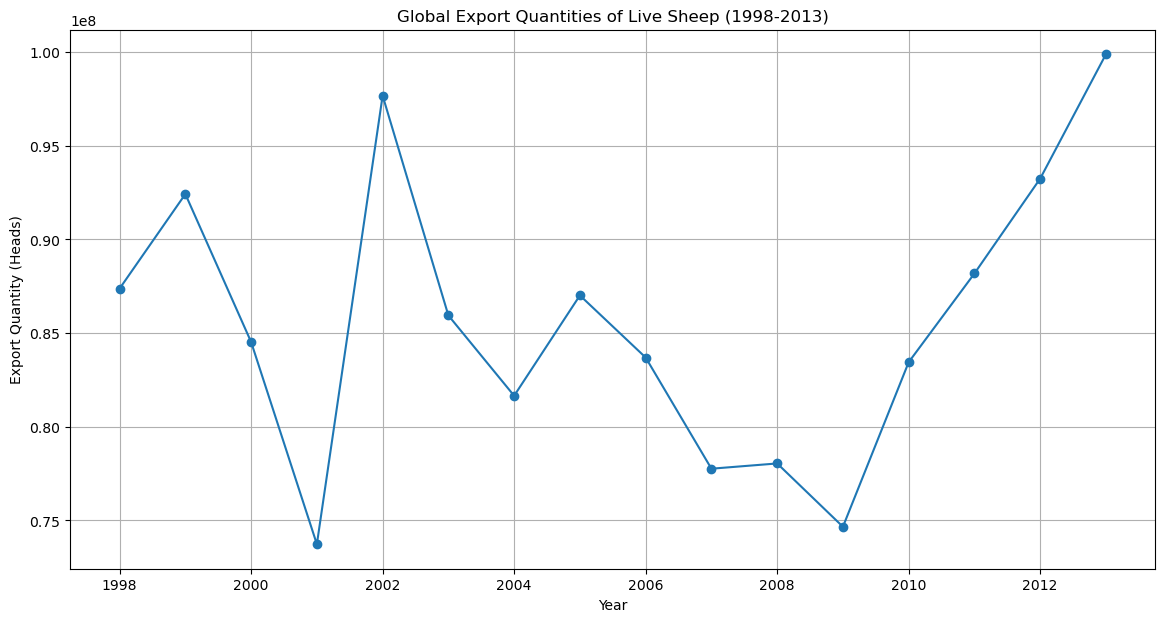

In [24]:
# 1. Trend Analysis
# 1.1 Export Quantities of Live Sheep (1998-2013)

# Group by year and sum export quantities globally
global_export_quantity = sheep_export_quantity.groupby(sheep_export_quantity['year'].dt.year)['value'].sum()

# Plot global export quantities
plt.figure(figsize=(14, 7))
plt.plot(global_export_quantity, marker='o', linestyle='-')
plt.title('Global Export Quantities of Live Sheep (1998-2013)')
plt.xlabel('Year')
plt.ylabel('Export Quantity (Heads)')
plt.grid(True)
plt.show()

Purpose of the Visualization

The purpose of this visualization is to illustrate the trend in global export quantities of live sheep from 1998 to 2013. By plotting the annual export quantities, this graph helps to identify patterns, fluctuations, and significant changes in the number of sheep exported worldwide over the specified period. This analysis provides insights into the market dynamics, highlighting years with notable increases or decreases in export activity, and facilitates understanding of the overall growth trajectory in the live sheep export sector.

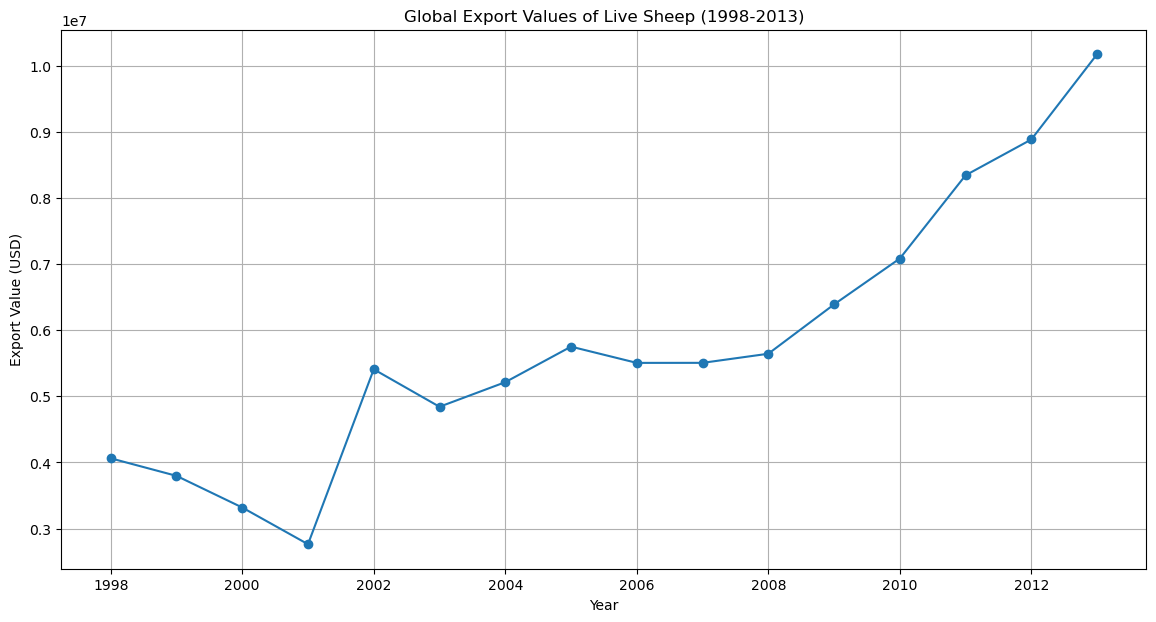

In [25]:
# 1.2 Export Values of Live Sheep (1998-2013)

# Group by year and sum export values globally
global_export_value = sheep_export_value.groupby(sheep_export_value['year'].dt.year)['value'].sum()

# Plot global export values
plt.figure(figsize=(14, 7))
plt.plot(global_export_value, marker='o', linestyle='-')
plt.title('Global Export Values of Live Sheep (1998-2013)')
plt.xlabel('Year')
plt.ylabel('Export Value (USD)')
plt.grid(True)
plt.show()


Purpose of the Visualization

The purpose of this visualization is to depict the trend in global export values of live sheep from 1998 to 2013. By plotting the annual export values, this graph aims to highlight the financial dynamics of the live sheep export market, showcasing periods of growth, decline, and volatility in export revenues. This analysis provides valuable insights into the economic impact of the live sheep trade, helping to identify key years with significant changes in export values and understand the overall financial trends in the sector.

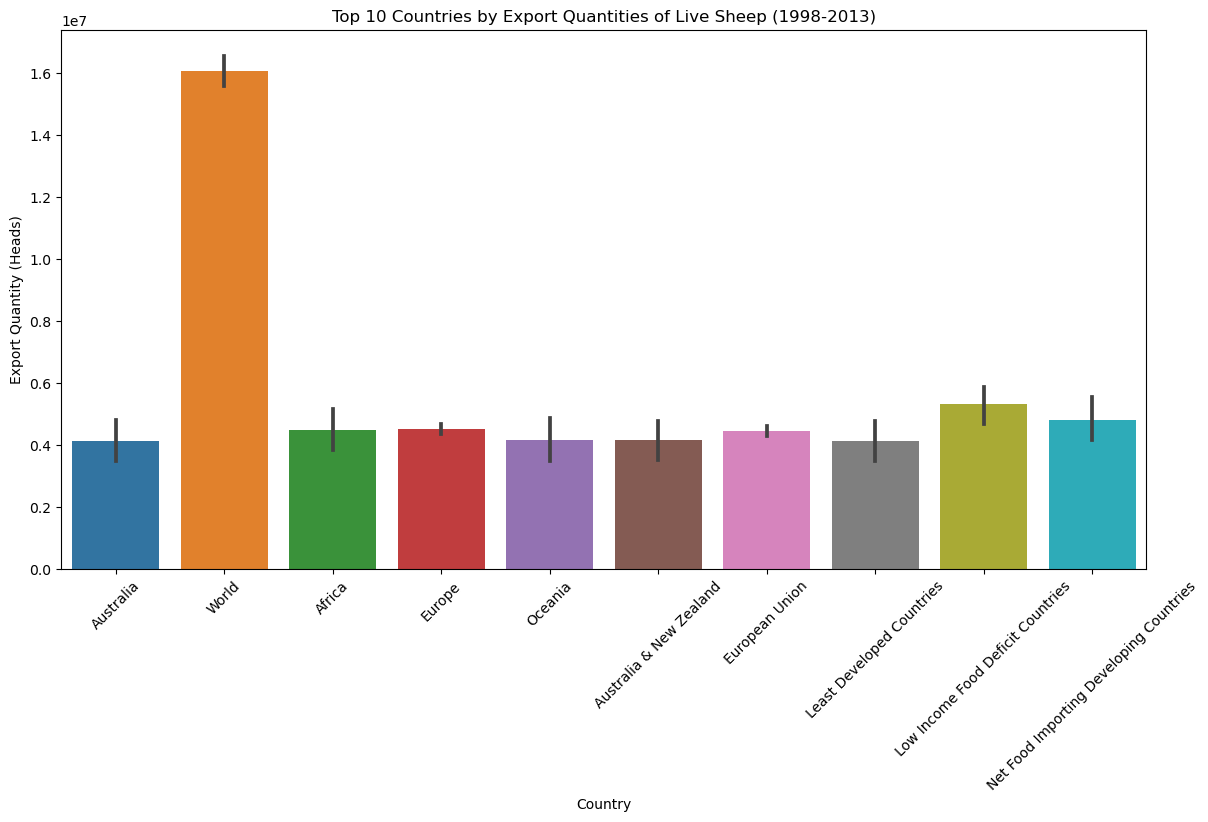

In [26]:
# Top 10 Countries: Country Comparison


top_countries = sheep_export_quantity.groupby('country')['value'].sum().nlargest(10).index
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y='value', data=sheep_export_quantity[sheep_export_quantity['country'].isin(top_countries)])
plt.title('Top 10 Countries by Export Quantities of Live Sheep (1998-2013)')
plt.xlabel('Country')
plt.ylabel('Export Quantity (Heads)')
plt.xticks(rotation=45)
plt.show()


Purpose of the Visualization

The purpose of this visualization is to compare the top 10 countries by their export quantities of live sheep from 1998 to 2013. By using a bar plot, this graph highlights the leading exporters, providing a clear visual representation of each country's contribution to global live sheep exports. This analysis helps identify the dominant players in the market, offering insights into regional export strengths and enabling a better understanding of the distribution of export activities across different countries.

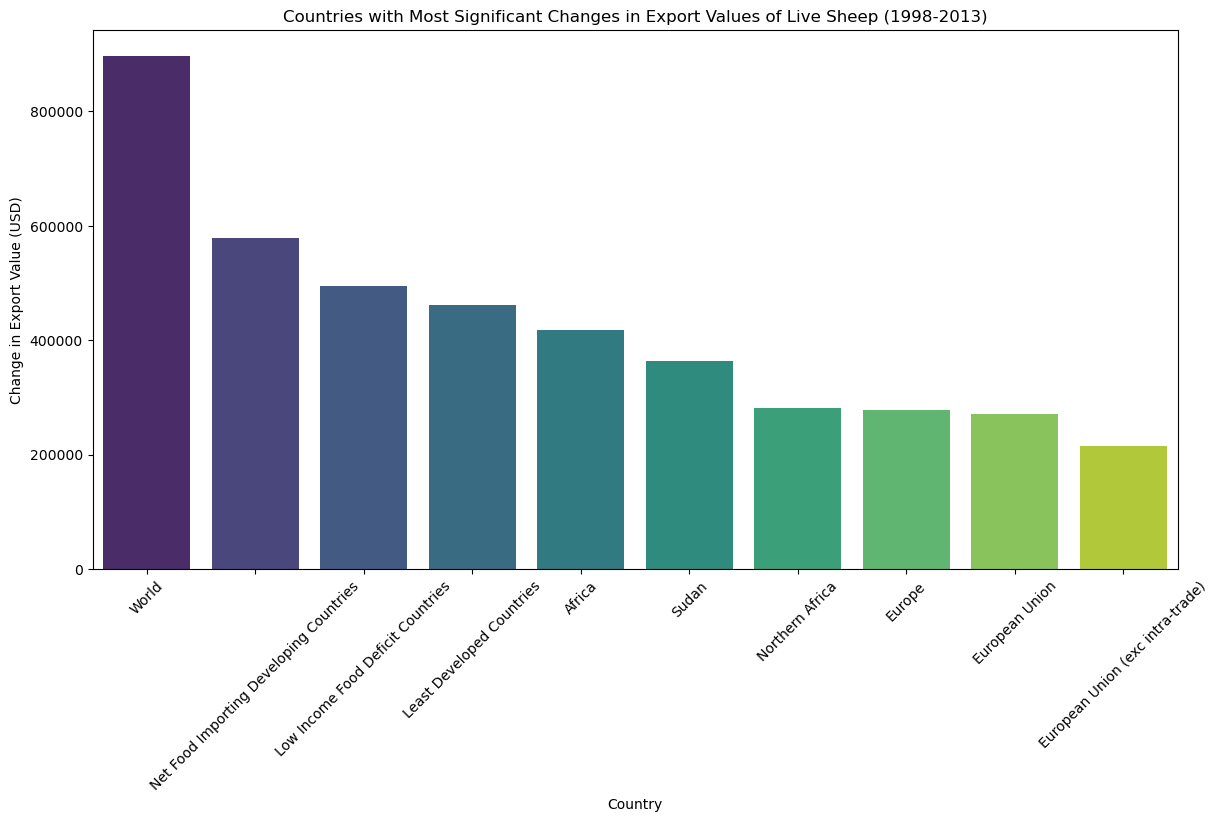

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'country' column is correctly named and used
sheep_export_value.rename(columns={'Area': 'country', 'Value': 'value', 'Year': 'year'}, inplace=True)

# Calculate the change in export values over the years for each country
country_year_export_value = sheep_export_value.groupby(['country', sheep_export_value['year'].dt.year])['value'].sum().unstack().fillna(0)
country_export_value_change = country_year_export_value.diff(axis=1).sum(axis=1).nlargest(10).reset_index()

# Plot countries with the most significant changes in export values
plt.figure(figsize=(14, 7))
sns.barplot(x='country', y=0, data=country_export_value_change, palette='viridis')
plt.title('Countries with Most Significant Changes in Export Values of Live Sheep (1998-2013)')
plt.xlabel('Country')
plt.ylabel('Change in Export Value (USD)')
plt.xticks(rotation=45)
plt.show()


Purpose of the Visualization

The purpose of this visualization is to identify and illustrate the countries with the most significant changes in export values of live sheep from 1998 to 2013. By using a bar plot, this graph highlights the top 10 countries that experienced the greatest fluctuations in export values over the years. This analysis provides insights into the dynamic nature of export activities in these countries, helping to understand which regions saw the most substantial economic changes in their live sheep export markets.

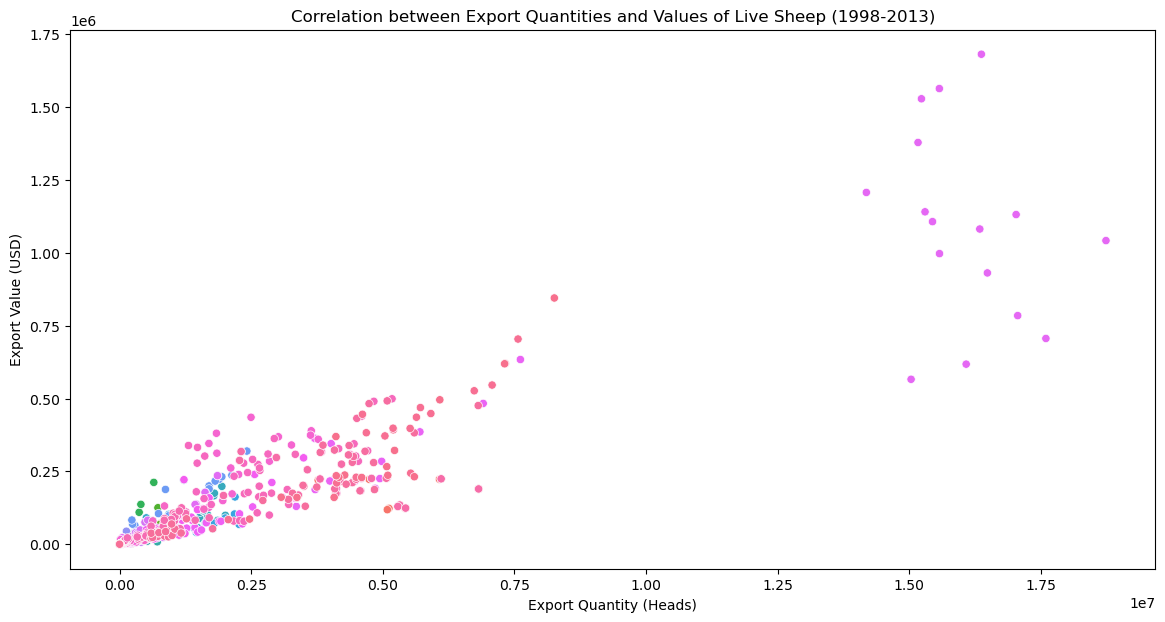

In [28]:
# Correlation Analysis

merged_data = pd.merge(sheep_export_quantity, sheep_export_value, on=['country', 'year'], suffixes=('_quantity', '_value'))
plt.figure(figsize=(14, 7))
sns.scatterplot(x='value_quantity', y='value_value', hue='country', data=merged_data)
plt.title('Correlation between Export Quantities and Values of Live Sheep (1998-2013)')
plt.xlabel('Export Quantity (Heads)')
plt.ylabel('Export Value (USD)')
plt.legend().remove()
plt.show()


Purpose of the Visualization

The purpose of this visualization is to analyze the correlation between export quantities and export values of live sheep from 1998 to 2013. Using a scatter plot, this graph displays the relationship between the number of sheep exported and the corresponding export revenues for various countries. By coloring the data points by country, the visualization helps to identify trends and patterns within each region, providing insights into how export volumes correlate with economic returns across different nations. This analysis aids in understanding the overall market dynamics and the financial impact of live sheep exports globally.

# Step 4 Modeling

In [54]:

# Create separate DataFrames for export quantity and export value
sheep_export_quantity = sheep_data[sheep_data['element'] == 'Export Quantity'].copy()
sheep_export_value = sheep_data[sheep_data['element'] == 'Export Value'].copy()

# Ensure that the Year column is in datetime format
sheep_export_quantity['year'] = pd.to_datetime(sheep_export_quantity['year'], format='%Y')
sheep_export_value['year'] = pd.to_datetime(sheep_export_value['year'], format='%Y')

# Filter data for the last 15 years (1998 - 2013)
sheep_export_quantity = sheep_export_quantity[sheep_export_quantity['year'].dt.year >= 1998]
sheep_export_value = sheep_export_value[sheep_export_value['year'].dt.year >= 1998]


In [55]:
# Predictive Analysis Function

def predictive_analysis(df, element_value):
    filtered_data = df[df['element'] == element_value]
    filtered_data['year'] = pd.to_datetime(filtered_data['year'], format='%Y')
    past_15_years_data = filtered_data[filtered_data['year'].dt.year >= 1998]
    top_countries = past_15_years_data.groupby(['country', 'year'])['value'].sum().unstack(level=0)
    top_countries_total = top_countries.sum().nlargest(10).index
    top_countries_data = top_countries[top_countries_total]
    X = top_countries_data.dropna().reset_index(drop=True)
    y = top_countries_data.sum(axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = {
        "Linear Regression": Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
        "Random Forest": Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(random_state=42))]),
        "K-Nearest Neighbors": Pipeline([('scaler', StandardScaler()), ('regressor', KNeighborsRegressor())]),
        "Support Vector Regression": Pipeline([('scaler', StandardScaler()), ('regressor', SVR())])
    }
    param_grid = {
        'Random Forest': {'regressor__n_estimators': [50, 100, 150]},
        'Support Vector Regression': {'regressor__C': [0.1, 1, 10], 'regressor__kernel': ['linear', 'poly', 'rbf']}
    }
    results = []
    for name, model in models.items():
        if name in param_grid:
            grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model
        best_model.fit(X_train, y_train)
        predictions = best_model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        evs = explained_variance_score(y_test, predictions)
        mape = mean_absolute_percentage_error(y_test, predictions)
        results.append({
            'Model': name,
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae,
            'R-squared': r2,
            'Explained Variance Score': evs,
            'Mean Absolute Percentage Error': mape
        })
    return results


In [56]:
# Predictive Analysis for Export Quantity

# Predictive Analysis for Export Quantity
element_value = 'Export Quantity'
results_export_quantity = predictive_analysis(sheep_data, element_value)

# Display results for export quantity
print(f"Results for {element_value}:")
for result in results_export_quantity:
    print(f"Model: {result['Model']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"Mean Absolute Error: {result['Mean Absolute Error']}")
    print(f"R-squared: {result['R-squared']}")
    print(f"Explained Variance Score: {result['Explained Variance Score']}")
    print(f"Mean Absolute Percentage Error: {result['Mean Absolute Percentage Error']}")
    print("="*50)


Results for Export Quantity:
Model: Linear Regression
Mean Squared Error: 1.3877787807814457e-17
Mean Absolute Error: 1.862645149230957e-09
R-squared: 1.0
Explained Variance Score: 1.0
Mean Absolute Percentage Error: 3.1740543166790295e-17
Model: Random Forest
Mean Squared Error: 17510187980806.145
Mean Absolute Error: 3584795.119999999
R-squared: -2.0716101361501598
Explained Variance Score: -0.18192481208976585
Mean Absolute Percentage Error: 0.05876337258734799
Model: K-Nearest Neighbors
Mean Squared Error: 36214449549614.67
Mean Absolute Error: 5616536.35
R-squared: -5.3526828172049035
Explained Variance Score: 0.1809766716268858
Mean Absolute Percentage Error: 0.09220955329818957
Model: Support Vector Regression
Mean Squared Error: 45256729096638.62
Mean Absolute Error: 6289423.123750754
R-squared: -6.938865532147027
Explained Variance Score: 0.00013482303124623396
Mean Absolute Percentage Error: 0.10312890444865833


In [57]:
# Predictive Analysis for Export Value

# Predictive Analysis for Export Value
element_value = 'Export Value'
results_export_value = predictive_analysis(sheep_data, element_value)

# Display results for export value
print(f"Results for {element_value}:")
for result in results_export_value:
    print(f"Model: {result['Model']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"Mean Absolute Error: {result['Mean Absolute Error']}")
    print(f"R-squared: {result['R-squared']}")
    print(f"Explained Variance Score: {result['Explained Variance Score']}")
    print(f"Mean Absolute Percentage Error: {result['Mean Absolute Percentage Error']}")
    print("="*50)


Results for Export Value:
Model: Linear Regression
Mean Squared Error: 6.396792817664476e-18
Mean Absolute Error: 2.3283064365386963e-09
R-squared: 1.0
Explained Variance Score: 1.0
Mean Absolute Percentage Error: 7.172680954533761e-16
Model: Random Forest
Mean Squared Error: 224758298745.3733
Mean Absolute Error: 452614.20666666655
R-squared: 0.8592469724033918
Explained Variance Score: 0.9079413374424358
Mean Absolute Percentage Error: 0.15833218582739236
Model: K-Nearest Neighbors
Mean Squared Error: 276411094788.4501
Mean Absolute Error: 492485.55000000005
R-squared: 0.8268998356459205
Explained Variance Score: 0.8322507448992588
Mean Absolute Percentage Error: 0.14682545229455543
Model: Support Vector Regression
Mean Squared Error: 1625552022657.0762
Mean Absolute Error: 1154813.5716464464
R-squared: -0.01798852359165104
Explained Variance Score: 0.000951027089228007
Mean Absolute Percentage Error: 0.350019121093482
